# Figures 4-5. Compositional breakdown and size of property subsets

Make sure environment is using `glasspy 0.4.6`.

In [1]:
from glasspy.predict.models import GlassNet

from matplotlib.container import BarContainer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
myrcparams = {
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'axes.labelcolor': 'black',
    'xtick.labelcolor': 'black',
    'ytick.labelcolor': 'black',
    #'axes.xmargin': 0,
    #'axes.ymargin': 0,
    'legend.fontsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.autolayout': True,
    'figure.figsize': (4.5,4)
}
plt.rcParams.update(myrcparams)

In [8]:
cols = ['Tg', 'Tc', 'Tx', 'Tl', 'T_Umax', 'log_Umax']
titles = ['$T_g$', '$T_c$', '$T_x$', '$T_l$', '$T_{max(U)}$', '$log(U_{max})$']

In [13]:
formers = ['Si', 'P', 'B', 'Al']
modifiers = ['Na', 'Li', 'K', 'Ca', 'Mg'] # have not used yet

## Load GlassNet training and test data

In [3]:
glassnet_no_stnn = GlassNet(st_models=[])
glassnet_stnn = GlassNet()
glassnet_test_df = glassnet_stnn.get_test_dataset()
glassnet_train_df = glassnet_stnn.get_training_dataset()

In [4]:
X_glassnet_test = glassnet_test_df.elements
X_glassnet_train = glassnet_train_df.elements
X_glassnet_total = pd.concat( (X_glassnet_train, X_glassnet_test) )

In [5]:
X_glassnet_feats_test, feats = glassnet_stnn.featurizer(X_glassnet_test, return_cols = True)
X_glassnet_feats_train, feats = glassnet_stnn.featurizer(X_glassnet_train, return_cols = True)

In [6]:
X_glassnet_feats_test = pd.DataFrame(X_glassnet_feats_test, columns = feats)
X_glassnet_feats_train = pd.DataFrame(X_glassnet_feats_train, columns = feats)

In [7]:
X_glassnet_feats_test.index = X_glassnet_test.index
X_glassnet_feats_train.index = X_glassnet_train.index
X_glassnet_feats_total = pd.concat( (X_glassnet_feats_train, X_glassnet_feats_test) )

In [8]:
y_glassnet_test = glassnet_test_df.property.rename(columns={'CrystallizationOnset':'Tx', 'CrystallizationPeak':'Tc', 'TMaxGrowthVelocity': 'T_Umax', 
                           'MaxGrowthVelocity': 'log_Umax', 'Tliquidus':'Tl'})
y_glassnet_train = glassnet_train_df.property.rename(columns={'CrystallizationOnset':'Tx', 'CrystallizationPeak':'Tc', 'TMaxGrowthVelocity': 'T_Umax', 
                           'MaxGrowthVelocity': 'log_Umax', 'Tliquidus':'Tl'})
y_glassnet_total = pd.concat( (y_glassnet_train, y_glassnet_test) )

In [9]:
N_total_train = len(y_glassnet_train)
N_total_test = len(y_glassnet_test)

In [10]:
N_vec_train, perc_vec_train = [], []
cols_list = [ 'Tg', 'Tl', 'Tc', 'Tx', ['Tg', 'Tc'], ['Tg', 'Tx'], ['Tg', 'Tc', 'Tl'], ['Tg', 'Tx', 'Tl'], 'Tl',  'T_Umax', 'log_Umax', ['Tl', 'T_Umax', 'log_Umax'] ]
for col in cols_list:
    this_N = len( y_glassnet_train[col].dropna() )
    N_vec_train.append( this_N )
    perc_vec_train.append( 100 * this_N / N_total_train )

In [11]:
train_prop_dict = {}
for cols in cols_list:
    train_spec_dict= {}
    this_X_train = X_glassnet_train.loc[ y_glassnet_train[cols].dropna().index, : ]

    for i,row in this_X_train.iterrows():
        this_row = row[ row != 0.0 ]
        for j,item in this_row.items():
            if j != 'O' and item > 0.05:
                if j in train_spec_dict.keys():
                    train_spec_dict[j].append(item)
                else:
                    train_spec_dict[j] = [item]
                    
    if type(cols) == list:
        train_prop_dict[ ','.join(cols) ] = train_spec_dict

    else:
        train_prop_dict[cols] = train_spec_dict

## Figure 4

Tg
Tl
Tc
Tx


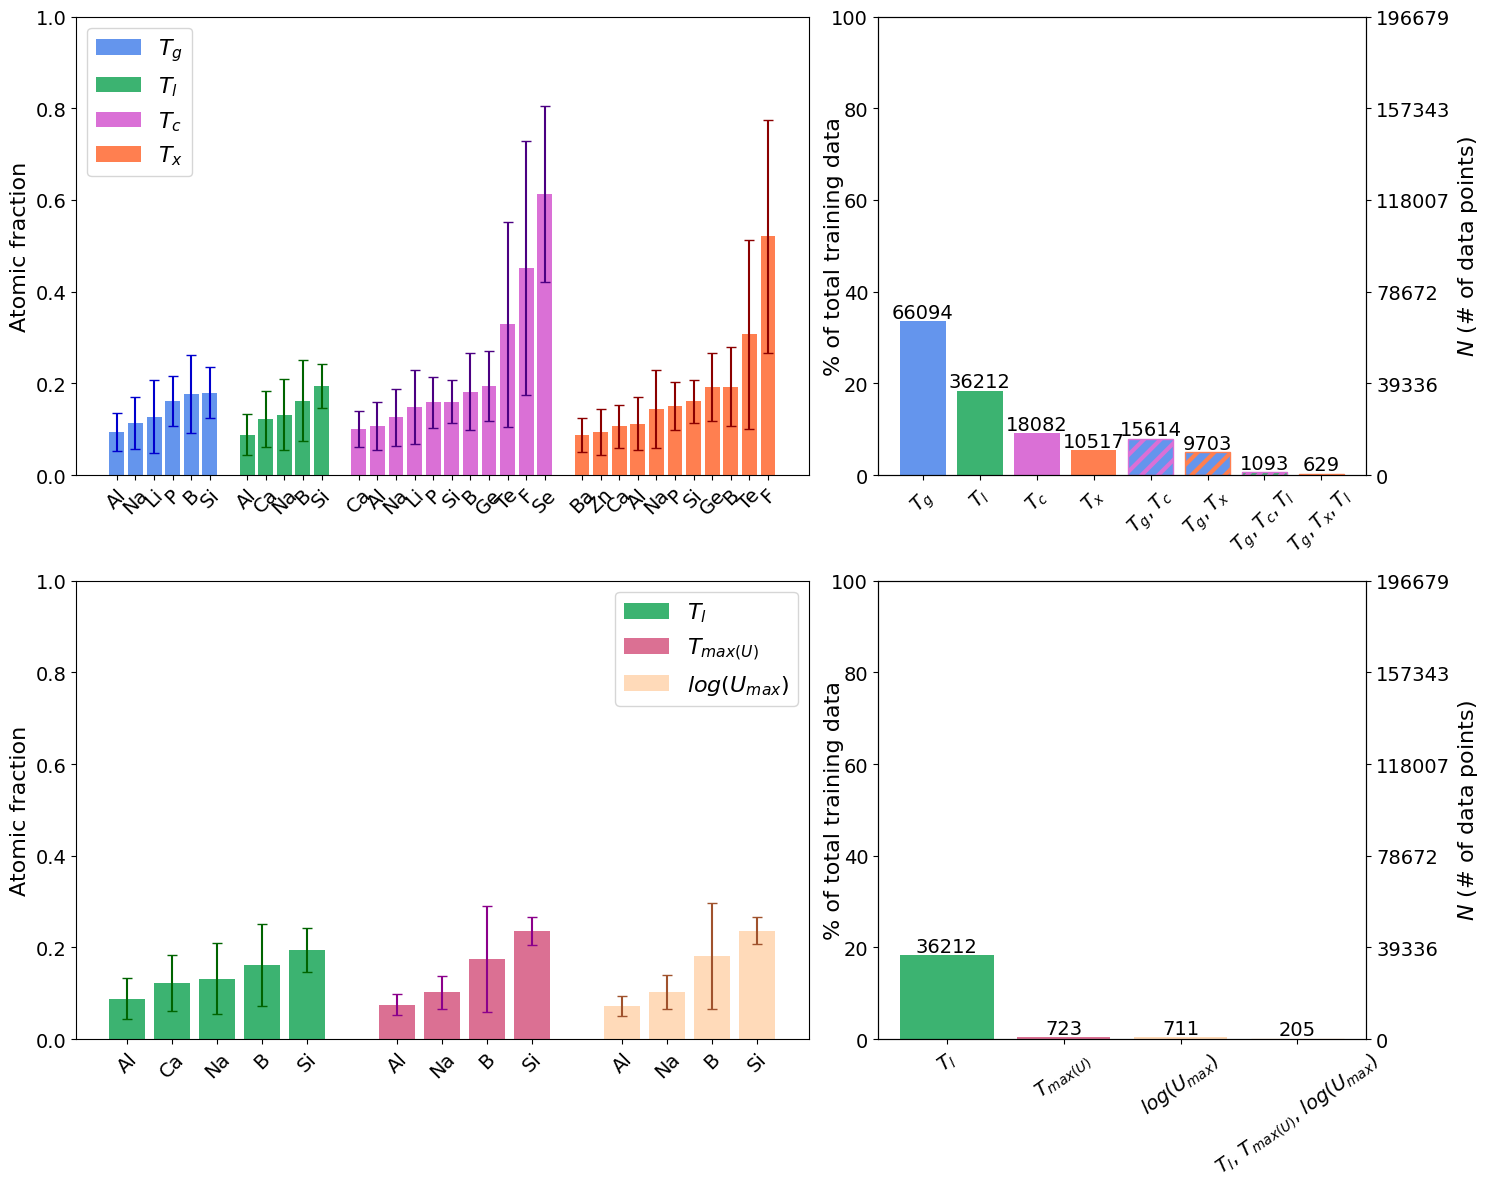

In [12]:
fig,axes = plt.subplots(2,2, figsize=(15.0,12), gridspec_kw={'width_ratios': [1.5, 1]})
ax_gs = axes[0,0]
ax_gfa = axes[1,0]
gs_colors = ['cornflowerblue', 'mediumseagreen', 'orchid', 'coral']
gfa_colors = ['mediumseagreen', 'palevioletred','peachpuff']
gs_ecolors = ['mediumblue', 'darkgreen', 'indigo', 'darkred']
gfa_ecolors = ['darkgreen', 'darkmagenta','sienna']
count_gs, count_gfa = 0, 0 
xticklabels_gs, xticks_gs = [], []
xticklabels_gfa, xticks_gfa = [], []
legend_labels = ['$T_{g}$', '$T_{l}$', '$T_{c}$', '$T_{x}$', '$T_{g}, T_{c}$', '$T_{g}, T_{x}$', '$T_{g}, T_{c}, T_{l}$', '$T_{g}, T_{x}, T_{l}$', '$T_{l}$', '$T_{max(U)}$', '$log(U_{max})$', '$T_{l}$, $T_{max(U)}$, $log(U_{max})$']
for i, key1 in enumerate(list(train_prop_dict.keys())[:4]):
    value1_train = train_prop_dict[key1]
    cols = cols_list[i]
    print(key1)
    
    el_train,y_train,std_train = [], [], []
    for key2, value2, in value1_train.items():
        perc_train = 100*len(value2)/len(y_glassnet_train[cols].dropna())
        if perc_train > 10:
            el_train.append( key2 )
            y_train.append( np.mean(value2) ) 
            std_train.append( np.std(value2) )

    std_train = np.array(std_train)
    
    x_train = range(count_gs + 1, count_gs + 1 + len(y_train) )
    ax_gs.bar( x_train, sorted(y_train), yerr = std_train[ np.argsort(y_train) ], color=gs_colors[i], ecolor=gs_ecolors[i], capsize=3.5, label = legend_labels[i] )
    
    el_train = np.array(el_train)
    for e in el_train[ np.argsort(y_train) ]:
        xticklabels_gs.append(e)
    for c in x_train:
        xticks_gs.append(c)
        
    count_gs = count_gs + len(y_train) + 1
     
for i, key1 in enumerate(['Tl']+list(train_prop_dict.keys())[8:10]):
    value1_train = train_prop_dict[key1]
    cols = key1

    el_train,y_train,std_train = [], [], []
    for key2, value2, in value1_train.items():
        perc_train = 100*len(value2)/len(y_glassnet_train[cols].dropna())
       
        if perc_train > 10:
            el_train.append( key2 )
            y_train.append( np.mean(value2) ) 
            std_train.append( np.std(value2) )

    std_train = np.array(std_train)
    
    x_train = range(count_gfa + 1, count_gfa + 1 + len(y_train) )
    ax_gfa.bar( x_train, sorted(y_train), yerr = std_train[ np.argsort(y_train) ], color=gfa_colors[i], ecolor=gfa_ecolors[i], capsize=3.5, label = legend_labels[i+8] )
    
    el_train = np.array(el_train)
    for e in el_train[ np.argsort(y_train) ]:
        xticklabels_gfa.append(e)
    for c in x_train:
        xticks_gfa.append(c)
        
    count_gfa = count_gfa + len(y_train) + 1
    
ax_gs.set_xticks( xticks_gs )
ax_gs.set_xticklabels( xticklabels_gs, rotation=45 )
ax_gs.set_ylabel( 'Atomic fraction' )
ax_gs.set_ylim(0,1.0)
ax_gs.legend()

ax_gfa.set_xticks( xticks_gfa )
ax_gfa.set_xticklabels( xticklabels_gfa, rotation=45 )
ax_gfa.set_ylabel( 'Atomic fraction' )
ax_gfa.set_ylim(0,1.0)
ax_gfa.legend()

ax_gs = axes[0,1]
ax_gfa = axes[1,1]
ax_gs.bar(range(4), perc_vec_train[:4], color = gs_colors )
ax_gfa.bar(range(3), perc_vec_train[-4:-1], color = gfa_colors )

plt.rcParams['hatch.linewidth'] = 4
for i in range(4,6):
    ax_gs.bar( i, perc_vec_train[i], color = gs_colors[0], edgecolor = gs_colors[i-2], hatch = '//' )
    
plt.rcParams['hatch.linewidth'] = 3
ax2_gs = ax_gs.twinx()
for i in range(6,8):
    ax_gs.bar( i, perc_vec_train[i], color = gs_colors[1], edgecolor = gs_colors[i-4], hatch = '///' )   
    
plt.rcParams['hatch.linewidth'] = 3
ax2_gfa = ax_gfa.twinx()
i = 11
ax_gfa.bar( 3, perc_vec_train[i], color = gfa_colors[1], edgecolor = gfa_colors[2], hatch = '///' )  
    
ax_gs.set_xticks( range(8) )
ax_gs.set_xticklabels( ['$T_{g}$', '$T_{l}$', '$T_{c}$', '$T_{x}$', '$T_{g}, T_{c}$', '$T_{g}, T_{x}$', '$T_{g}, T_{c}, T_{l}$', '$T_{g}, T_{x}, T_{l}$'], rotation=45 )
ax_gs.set_ylabel( '% of total training data' )
ax_gs.yaxis.set_label_coords(-0.07, 0.5)
for i in range(8):
    ax_gs.text(i, perc_vec_train[i]+0.7, N_vec_train[i], ha = 'center', fontsize=14)
ax_gs.set_ylim(0,100)

ax_gfa.set_xticks( range(4) )
ax_gfa.set_xticklabels( ['$T_{l}$','$T_{max(U)}$', '$log(U_{max})$', '$T_{l}$, $T_{max(U)}$, $log(U_{max})$'] , rotation=35 )
ax_gfa.set_ylabel( '% of total training data' )
ax_gfa.yaxis.set_label_coords(-0.07, 0.5)
for i in range(4):
    ax_gfa.text(i, perc_vec_train[i+8]+0.7, N_vec_train[i+8], ha = 'center', fontsize=14)
ax_gfa.set_ylim(0,100)

ax2_gs.set_yticks( [0.2*i*N_total_train for i in range(6) ] )
ax2_gfa.set_yticks( [0.2*i*N_total_train for i in range(6) ] )
ax2_gs.set_ylabel( '$N$ (# of data points)' )
ax2_gfa.set_ylabel( '$N$ (# of data points)' )
fig.savefig( 'figure4.png', dpi=600)

## Figure 5

In [14]:
X_by_former = []
for former in formers:
    X_by_former.append( X_glassnet_train[ X_glassnet_train[former] >  X_glassnet_train[ [f for f in formers if f != former] ].sum(axis=1) ] )  

X_by_modifier = []
for modifier in modifiers:
    X_by_modifier.append( X_glassnet_train[ X_glassnet_train[modifier] >  X_glassnet_train[ [f for f in modifiers if f != modifier] ].sum(axis=1) ] )   

In [15]:
counts = np.zeros( (len(formers)+1, len(cols_list) ) )

df_columns = []
for i,cols in enumerate(cols_list):
    if type(cols) == list:
        df_columns.append( ', '.join(cols) )
    else:
        df_columns.append(cols)

    sum = 0
    for j,X in enumerate(X_by_former):
        counts[j,i] = len(y_glassnet_train.loc[X.index, cols].dropna() )
        sum += counts[j,i]
        
    counts[len(formers),i] = len(y_glassnet_train[cols].dropna() ) - sum
counts_formers_df = pd.DataFrame( counts, columns = df_columns )
counts_formers_df.index = formers + ['other']

counts = np.zeros( (len(modifiers)+1, len(cols_list) ) )

df_columns = []
for i,cols in enumerate(cols_list):
    if type(cols) == list:
        df_columns.append( ', '.join(cols) )
    else:
        df_columns.append(cols)

    sum = 0
    for j,X in enumerate(X_by_modifier):
        counts[j,i] = len(y_glassnet_train.loc[X.index, cols].dropna() )
        sum += counts[j,i]
        
    counts[len(modifiers),i] = len(y_glassnet_train[cols].dropna() ) - sum
    
counts_modifiers_df = pd.DataFrame( counts, columns = df_columns )
counts_modifiers_df.index = modifiers + ['other']

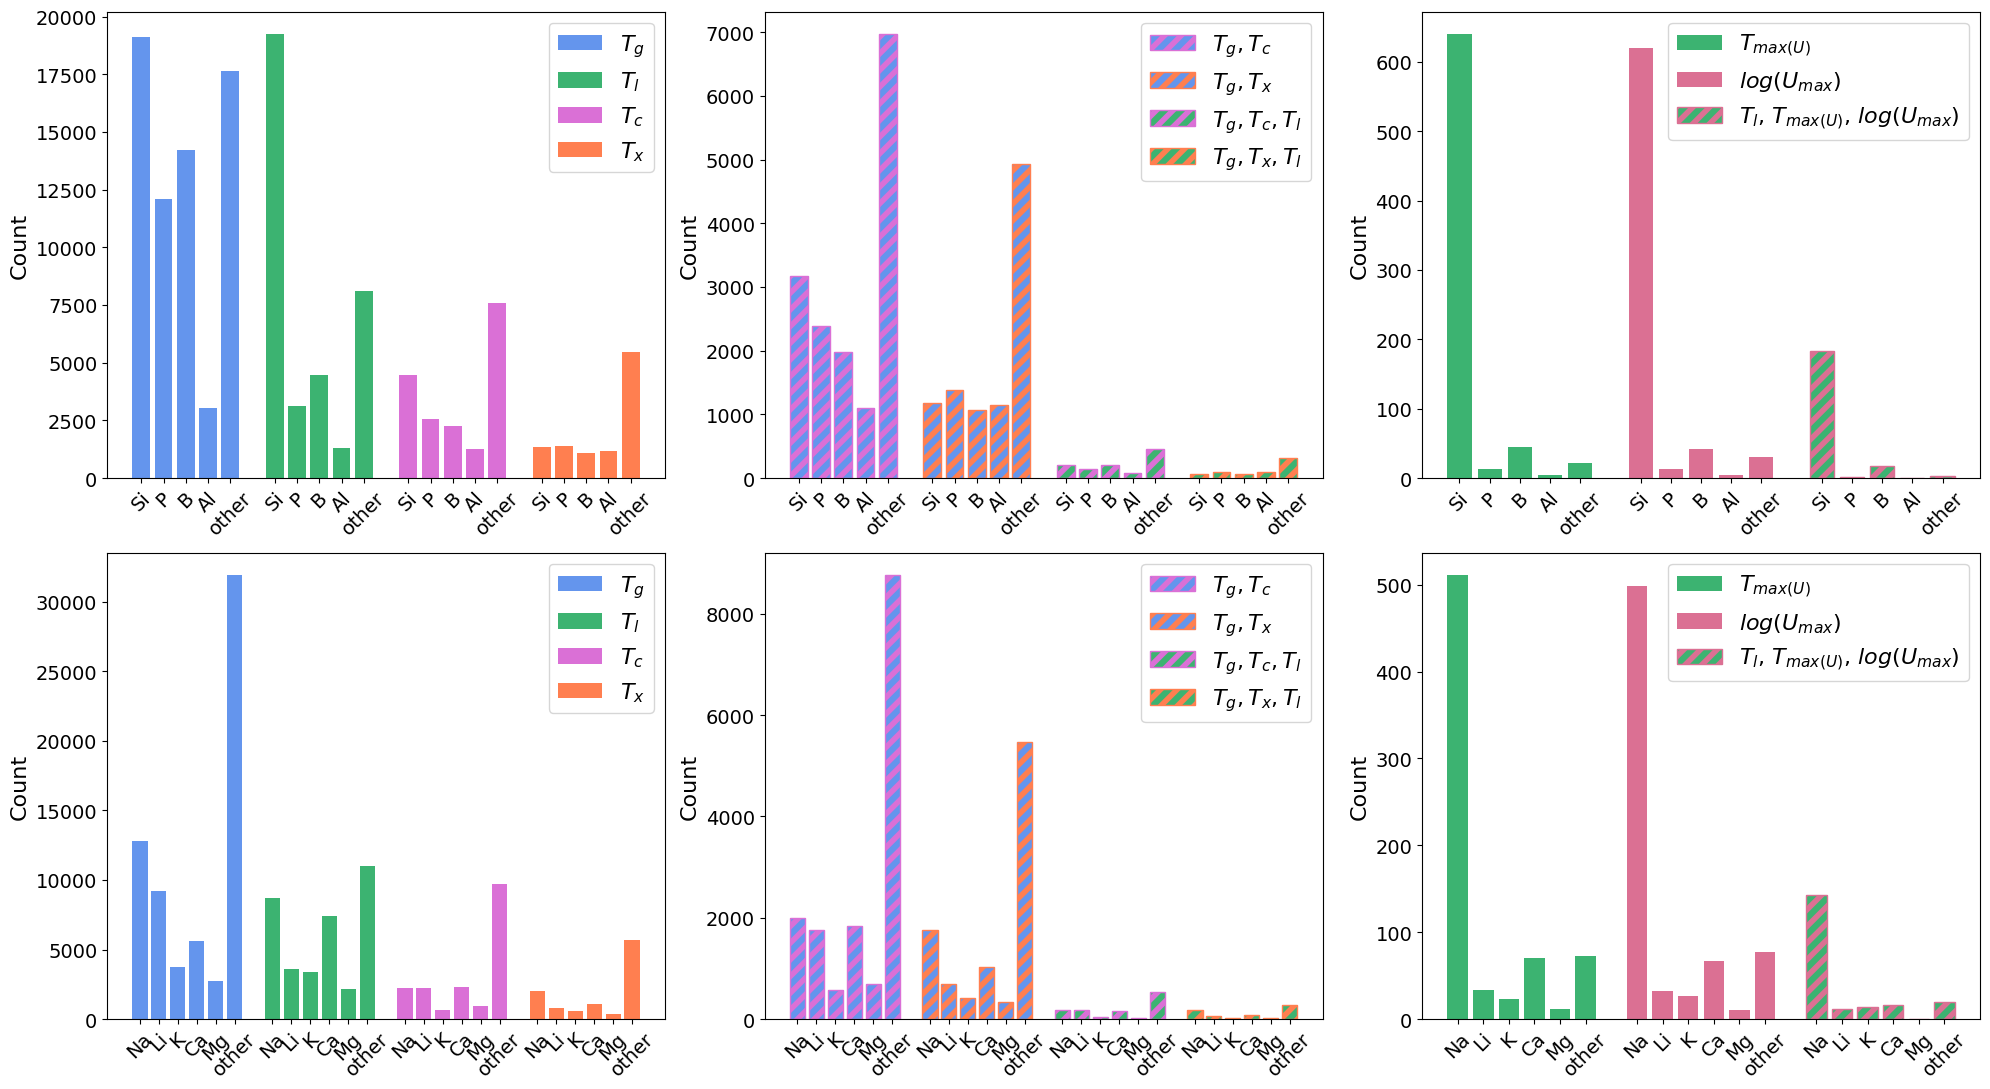

In [16]:
gs_cols = counts_formers_df.columns[:8]
gfa_cols = counts_formers_df.columns[8:]

fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(20,11))

colors = ['coral', 'dodgerblue', 'mediumaquamarine', 'orchid']
ecolors = ['darkred', 'navy', 'teal', 'darkmagenta']

legend_labels = ['$T_{g}$', '$T_{l}$', '$T_{c}$', '$T_{x}$', '$T_{g}, T_{c}$', '$T_{g}, T_{x}$', '$T_{g}, T_{c}, T_{l}$', '$T_{g}, T_{x}, T_{l}$']
x_vec = range( len(counts_formers_df) )
xticks = []
for i,col in enumerate(gs_cols):

    if i < 4:
        ax = axes[0,0]
        if col == 'Tl':
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_formers_df[col].iloc[:,0] , color=gs_colors[i], label = legend_labels[i] )
        else:
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_formers_df[col] , color=gs_colors[i], label = legend_labels[i]  )
        xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )
    else:
        ax = axes[0,1]
        plt.rcParams['hatch.linewidth'] = 4
        if i < 6:
            ci = 0
            ei = i-2
        else:
            ci = 1
            ei = i-4
            
        if col == 'Tl':
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ],  counts_formers_df[col].iloc[:,0] , color = gs_colors[ci], edgecolor = gs_colors[ei], hatch = '//', label = legend_labels[i] )
        else:
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ],  counts_formers_df[col] , facecolor = gs_colors[ci], edgecolor = gs_colors[ei], hatch = '//', label = legend_labels[i] )
        xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )

legend_labels = ['$T_{max(U)}$', '$log(U_{max})$', '$T_{l}$, $T_{max(U)}$, $log(U_{max})$' ]
x_vec = [ x + 8*(len(x_vec)+1) for x in x_vec ]
ax = axes[0,2]
for i,col in enumerate(gfa_cols[1:]):   
    if i < 2:
        ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_formers_df[col] , color=gfa_colors[i], label = legend_labels[i] )
    else:
        plt.rcParams['hatch.linewidth'] = 4
        ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_formers_df[col] , color=gfa_colors[0], edgecolor = gfa_colors[1], hatch = '//', label = legend_labels[i] )
    xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )

xticks = np.array(xticks).flatten()
count = 0
for i in range(3):
    axes[0,i].set_ylabel('Count')
    axes[0,i].legend()
    
    n_containers = len([i for i in axes[0,i].containers if isinstance(i, BarContainer)])
    n_bars = len(counts_formers_df.index)
    axes[0,i].set_xticks( xticks[count : count + n_containers*n_bars] )
    count += n_containers * n_bars
    
    axes[0,i].set_xticklabels( list( counts_formers_df.index ) * n_containers, rotation=45 )

legend_labels = ['$T_{g}$', '$T_{l}$', '$T_{c}$', '$T_{x}$', '$T_{g}, T_{c}$', '$T_{g}, T_{x}$', '$T_{g}, T_{c}, T_{l}$', '$T_{g}, T_{x}, T_{l}$']
x_vec = range( len(counts_modifiers_df) )
xticks = []
for i,col in enumerate(gs_cols):

    if i < 4:
        ax = axes[1,0]
        if col == 'Tl':
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_modifiers_df[col].iloc[:,0] , color=gs_colors[i], label = legend_labels[i] )
        else:
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_modifiers_df[col] , color=gs_colors[i], label = legend_labels[i]  )
        xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )
    else:
        ax = axes[1,1]
        plt.rcParams['hatch.linewidth'] = 4
        if i < 6:
            ci = 0
            ei = i-2
        else:
            ci = 1
            ei = i-4
            
        if col == 'Tl':
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ],  counts_modifiers_df[col].iloc[:,0] , color = gs_colors[ci], edgecolor = gs_colors[ei], hatch = '//', label = legend_labels[i] )
        else:
            ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ],  counts_modifiers_df[col] , facecolor = gs_colors[ci], edgecolor = gs_colors[ei], hatch = '//', label = legend_labels[i] )
        xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )

legend_labels = ['$T_{max(U)}$', '$log(U_{max})$', '$T_{l}$, $T_{max(U)}$, $log(U_{max})$' ]
x_vec = [ x + 8*(len(x_vec)+1) for x in x_vec ]
ax = axes[1,2]
for i,col in enumerate(gfa_cols[1:]):   
    if i < 2:
        ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_modifiers_df[col] , color=gfa_colors[i], label = legend_labels[i] )
    else:
        plt.rcParams['hatch.linewidth'] = 4
        ax.bar( [ x + i*(len(x_vec)+1) for x in x_vec ], counts_modifiers_df[col] , color=gfa_colors[0], edgecolor = gfa_colors[1], hatch = '//', label = legend_labels[i] )
    xticks.append( [ x + i*(len(x_vec)+1) for x in x_vec ] )

xticks = np.array(xticks).flatten()
count = 0
for i in range(3):
    axes[1,i].set_ylabel('Count')
    axes[1,i].legend()
    
    n_containers = len([i for i in axes[1,i].containers if isinstance(i, BarContainer)])
    n_bars = len(counts_modifiers_df.index)
    axes[1,i].set_xticks( xticks[count : count + n_containers*n_bars] )
    count += n_containers * n_bars
    
    axes[1,i].set_xticklabels( list( counts_modifiers_df.index ) * n_containers, rotation=45 )
fig.savefig( 'figure5.png', dpi=600)

In [17]:
counts_formers_df

,Tg,Tl,Tc,Tx,"Tg, Tc","Tg, Tx","Tg, Tc, Tl","Tg, Tx, Tl",Tl,T_Umax,log_Umax,"Tl, T_Umax, log_Umax"
Si,19118.0,19238.0,4471.0,1364.0,3178.0,1176.0,209.0,62.0,19238.0,640.0,620.0,183.0
P,12074.0,3117.0,2538.0,1402.0,2380.0,1383.0,149.0,95.0,3117.0,13.0,13.0,2.0
B,14228.0,4449.0,2235.0,1100.0,1981.0,1066.0,199.0,65.0,4449.0,44.0,42.0,17.0
Al,3036.0,1300.0,1274.0,1174.0,1104.0,1143.0,74.0,92.0,1300.0,4.0,5.0,0.0
other,17638.0,8108.0,7564.0,5477.0,6971.0,4935.0,462.0,315.0,8108.0,22.0,31.0,3.0


In [18]:
counts_formers_df.sum(axis=0)

Tg                      66094.0
Tl                      36212.0
Tc                      18082.0
Tx                      10517.0
Tg, Tc                  15614.0
Tg, Tx                   9703.0
Tg, Tc, Tl               1093.0
Tg, Tx, Tl                629.0
Tl                      36212.0
T_Umax                    723.0
log_Umax                  711.0
Tl, T_Umax, log_Umax      205.0
dtype: float64